In [1]:
import numpy as np

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

from lora import adapt_model
from data.mnist import load_flat_mnist_datasets
from training.train import train_classifier
from viz.plot import plot_training_curves

In [2]:
mnist_train, mnist_eval = load_flat_mnist_datasets()

In [3]:
# flatten MNIST into (28 * 28,) vectors and use a dense classifier
sample, targets = mnist_train[0]
print(sample.shape, sample.min(), sample.max())

torch.Size([784]) tensor(-0.5000) tensor(0.5000)


5


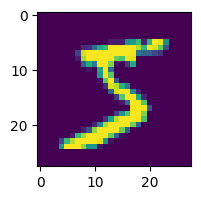

In [4]:
plt.figure(figsize=(2, 2))
plt.imshow(sample.reshape((28, 28)).numpy())
print(targets)

In [5]:
train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)
eval_loader = DataLoader(mnist_eval, batch_size=32, shuffle=False)

In [6]:
device = torch.device("mps")

In [7]:
def init_mnist_classifier() -> nn.Module:
    return nn.Sequential(
    nn.Linear(28 * 28, 128),
    nn.LeakyReLU(),
    nn.Linear(128, 128),
    nn.LeakyReLU(),
    nn.Linear(128, 10)
)

In [8]:
classifier = init_mnist_classifier().to(device)
optimizer = optim.Adam(classifier.parameters())
loss_fn = nn.CrossEntropyLoss()

In [9]:
classifier, train_loss_history, eval_loss_history, eval_acc_history = train_classifier(
    classifier,
    optimizer,
    loss_fn,
    train_loader,
    eval_loader,
    device,
    n_epochs=1
)

Output()

/Users/danielvaroli/Desktop/projects/my-lora/training/train.py:39: TqdmExperimentalWarning: rich is experimental/alpha
  with tqdm(total=train_steps) as pbar:


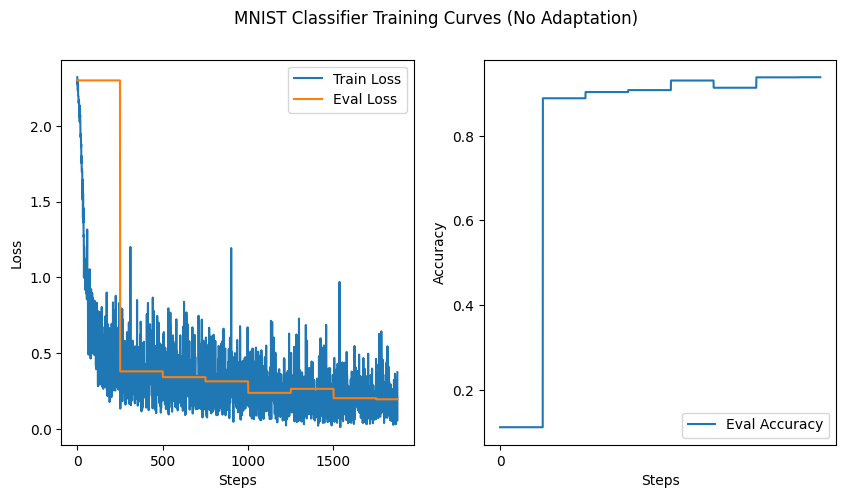

In [10]:
plot_training_curves(
    train_loss_history,
    eval_loss_history,
    eval_acc_history,
    title="MNIST Classifier Training Curves (No Adaptation)"
)

In [11]:
classifier = init_mnist_classifier().to(device)
classifier = adapt_model(classifier, low_rank_adapter_type="lora", rank=2, alpha=8).to(device)

print(classifier)

optimizer = optim.Adam(classifier.parameters())
loss_fn = nn.CrossEntropyLoss()

Sequential(
  (0): LowRankLinearAdapter(
    (_linear): Linear(in_features=784, out_features=128, bias=True)
    (_lora): LowRankAdapter()
  )
  (1): LeakyReLU(negative_slope=0.01)
  (2): LowRankLinearAdapter(
    (_linear): Linear(in_features=128, out_features=128, bias=True)
    (_lora): LowRankAdapter()
  )
  (3): LeakyReLU(negative_slope=0.01)
  (4): LowRankLinearAdapter(
    (_linear): Linear(in_features=128, out_features=10, bias=True)
    (_lora): LowRankAdapter()
  )
)


In [12]:
classifier, train_loss_history, eval_loss_history, eval_acc_history = train_classifier(
    classifier,
    optimizer,
    loss_fn,
    train_loader,
    eval_loader,
    device,
    n_epochs=1
)

Output()

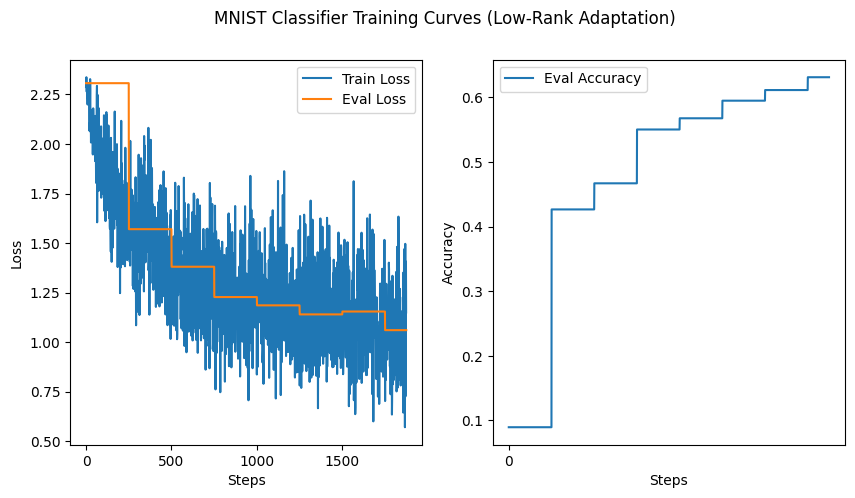

In [13]:
plot_training_curves(
    train_loss_history,
    eval_loss_history,
    eval_acc_history,
    title="MNIST Classifier Training Curves (Low-Rank Adaptation)"
)

In [14]:
classifier = init_mnist_classifier().to(device)
classifier = adapt_model(classifier, low_rank_adapter_type="dora", rank=2, alpha=8).to(device)

print(classifier)

optimizer = optim.Adam(classifier.parameters())
loss_fn = nn.CrossEntropyLoss()

TypeError: WeightDecomposedLinearAdapater.__init__() takes from 3 to 4 positional arguments but 5 were given

In [ ]:
classifier, train_loss_history, eval_loss_history, eval_acc_history = train_classifier(
    classifier,
    optimizer,
    loss_fn,
    train_loader,
    eval_loader,
    device,
    n_epochs=1
)

In [ ]:
plot_training_curves(
    train_loss_history,
    eval_loss_history,
    eval_acc_history,
    title="MNIST Classifier Training Curves (Weight-decomposed Adaptation)"
)